1. Import packages

In [0]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import mean_squared_error, r2_score
import sklearn.metrics as metrics

from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, make_scorer, confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.pipeline import Pipeline
from sklearn.neighbors import NearestCentroid

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [0]:
# Load data saved locally
df = pd.read_csv('./DataSetFinal_20200211_v2.csv', sep=';')

In [3]:
df.head()

,fecha,indicativo,playa,altitud,tmed,prec,tmin,horatmin,tmax,horatmax,dir,velmedia,racha,horaracha,ayer,precAyer,anteayer,precAnteayer,tmedAyer,tmaxAyer,tminAyer,dirAyer,velmediaAyer,rachaAyer,tmedAnteayer,tmaxAnteayer,tminAnteayer,dirAnteayer,velmediaAnteayer,rachaAnteayer,enteroc,ecoli,disponible
0,20190527,8025,PLAYA DE L'ALBUFERETA,81,19.8,0.0,14.4,04:50,25.2,09:20,120,1.9,6.4,13:30,20190526,0.0,20190525,0.0,20.2,26.4,13.9,190,2.2,8.9,19.6,23.8,15.4,990,3.1,9.7,1,10,0
1,20190527,8025,PLAYA DE L'ALMADRAVA,81,19.8,0.0,14.4,04:50,25.2,09:20,120,1.9,6.4,13:30,20190526,0.0,20190525,0.0,20.2,26.4,13.9,190,2.2,8.9,19.6,23.8,15.4,990,3.1,9.7,10,1,0
2,20190527,8025,PLAYA DE TABARCA,81,19.8,0.0,14.4,04:50,25.2,09:20,120,1.9,6.4,13:30,20190526,0.0,20190525,0.0,20.2,26.4,13.9,190,2.2,8.9,19.6,23.8,15.4,990,3.1,9.7,1,0,0
3,20190527,8025,PLAYA DEL POSTIGUET,81,19.8,0.0,14.4,04:50,25.2,09:20,120,1.9,6.4,13:30,20190526,0.0,20190525,0.0,20.2,26.4,13.9,190,2.2,8.9,19.6,23.8,15.4,990,3.1,9.7,1,1,0
4,20190527,8025,PLAYA DEL SALADAR,81,19.8,0.0,14.4,04:50,25.2,09:20,120,1.9,6.4,13:30,20190526,0.0,20190525,0.0,20.2,26.4,13.9,190,2.2,8.9,19.6,23.8,15.4,990,3.1,9.7,1,1,0


In [0]:
# Drop everything that is not numeric
# this line drop Fecha, hortmin, horatmax, horaracha, ayer and anteayer
df = df.select_dtypes(exclude=['object'])
# Fill Null values (nan) to 0
df = df.fillna(value=0)

In [5]:
df.head()

,fecha,altitud,tmed,prec,tmin,tmax,dir,velmedia,racha,ayer,precAyer,anteayer,precAnteayer,tmedAyer,tmaxAyer,tminAyer,dirAyer,velmediaAyer,rachaAyer,tmedAnteayer,tmaxAnteayer,tminAnteayer,dirAnteayer,velmediaAnteayer,rachaAnteayer,enteroc,ecoli,disponible
0,20190527,81,19.8,0.0,14.4,25.2,120,1.9,6.4,20190526,0.0,20190525,0.0,20.2,26.4,13.9,190,2.2,8.9,19.6,23.8,15.4,990,3.1,9.7,1,10,0
1,20190527,81,19.8,0.0,14.4,25.2,120,1.9,6.4,20190526,0.0,20190525,0.0,20.2,26.4,13.9,190,2.2,8.9,19.6,23.8,15.4,990,3.1,9.7,10,1,0
2,20190527,81,19.8,0.0,14.4,25.2,120,1.9,6.4,20190526,0.0,20190525,0.0,20.2,26.4,13.9,190,2.2,8.9,19.6,23.8,15.4,990,3.1,9.7,1,0,0
3,20190527,81,19.8,0.0,14.4,25.2,120,1.9,6.4,20190526,0.0,20190525,0.0,20.2,26.4,13.9,190,2.2,8.9,19.6,23.8,15.4,990,3.1,9.7,1,1,0
4,20190527,81,19.8,0.0,14.4,25.2,120,1.9,6.4,20190526,0.0,20190525,0.0,20.2,26.4,13.9,190,2.2,8.9,19.6,23.8,15.4,990,3.1,9.7,1,1,0


In [0]:
#Select Ecoli column as objective
y_column = 'disponible'
y = df[y_column]
# Drop returns a copy of the DataFrame with the specified columns removed  
X = df.drop([y_column, 'ecoli','enteroc'], axis=1) # remove will not be helpful


In [0]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
y_train

44      0
680     0
1405    0
168     0
303     0
       ..
1638    0
1095    0
1130    0
1294    0
860     0
Name: disponible, Length: 1671, dtype: int64

In [9]:
# Check how many columns our dataset has...
print(f"Number of features =  {X_train.shape[1]}")
num_features = X_train.shape[1]

Number of features =  25


In [0]:
def train_score_regressor(sklearn_regressor, X_train, y_train, X_test, y_test, model_parameters, print_oob_score=False):
    """A helper function that:
        - Trains a regressor on training data
        - Scores data on training and test data
        - Returns a trained model
    """
    # Step 1: Initializing the sklearn regressor 
    regressor = sklearn_regressor(**model_parameters)
    
    # Step 2: Training the algorithm using the X_train dataset of features and y_train, the associated target features
    regressor.fit(X_train, y_train)
    
    # Step 3: Calculating the score of the predictive power on the training and testing dataset.
    training_score = regressor.score(X_train, y_train)
    testing_score = regressor.score(X_test, y_test)
    
    # Print the results!
    print(f"Train score: {training_score:>5.4f}")
    print(f"Test score: {testing_score:>7.4f}")
    if print_oob_score:
        print(f"OOB score: {regressor.oob_score_:>8.4f}")
        
    return regressor

In [11]:
# define the parameters
parameters = {"oob_score": True, 
              "n_estimators": 50, 
              "max_features": num_features, 
              'random_state': 42}

trained_regressor = train_score_regressor(sklearn_regressor=RandomForestRegressor,
                                          X_train=X_train, 
                                          y_train=y_train, 
                                          X_test=X_test, 
                                          y_test=y_test, 
                                          model_parameters=parameters,
                                          print_oob_score=True)

Train score: 0.3847
Test score:  0.1284
OOB score:   0.0670


In [0]:
# Plot a graph of the true values vs the predicted values for the training and test datasets
def plot_y_yhat_scatter(y_actual,y_predicted,train_test):
    ax = sns.regplot(x=y_actual, y=y_predicted, fit_reg=False)
    ax.set_xlabel('true values')
    ax.set_ylabel('predicted values')
    ax.set_title('Relationship between true and predicted DISPONIBLE amounts: '+train_test+' results')
    pass

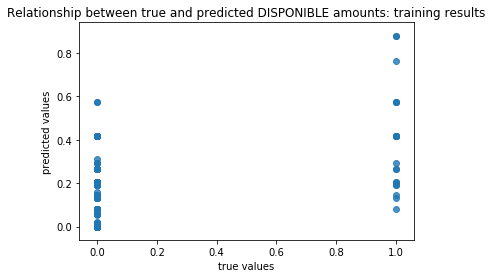

In [13]:
plot_y_yhat_scatter(y_train, trained_regressor.predict(X_train),train_test="training")

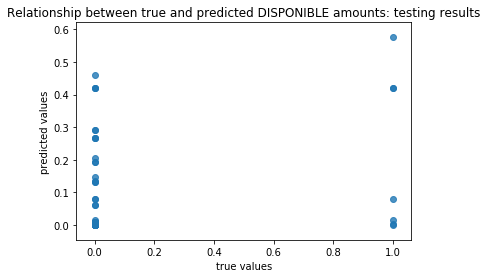

In [14]:
plot_y_yhat_scatter(y_test, trained_regressor.predict(X_test),train_test="testing")

Tune Parameters

Again, how do we know the best combination of hyperparameters?

Cross validated Grid Search!

We're searching over a small range here to save time but in practice, we should search over a bigger range of hyperparameters.

This can take a while

In [15]:
# define parameters
parameters = {'max_depth':[7,10,15], 
#               'max_features': ['sqrt', 5, 10],
              'n_estimators': [50,100,200]}
# initialize model
rf_regressor= RandomForestRegressor(n_jobs=-1, random_state=42)
# initialize grid search and fit
regressor = GridSearchCV(rf_regressor, parameters)
regressor.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_job

In [16]:
# print out what GridSearchCV found to be the best parameters 
regressor.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 7,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [17]:
# Take the best parameters from grid search and fit a model
parameters = regressor.best_estimator_.get_params()
trained_regressor = train_score_regressor(sklearn_regressor=RandomForestRegressor,
                                          X_train=X_train, 
                                          y_train=y_train, 
                                          X_test=X_test, 
                                          y_test=y_test, 
                                          model_parameters=parameters,
                                          print_oob_score=False)

Train score: 0.3831
Test score:  0.1700


Compare this Random Forest to the result from the Decision Tree.

Which one is better?

Why?



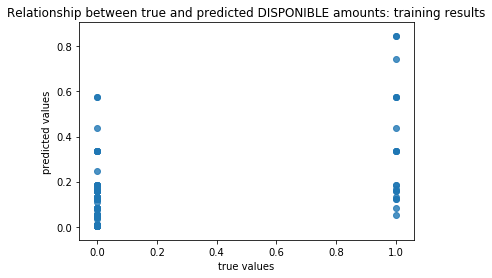

In [18]:
plot_y_yhat_scatter(y_train, trained_regressor.predict(X_train),train_test="training")

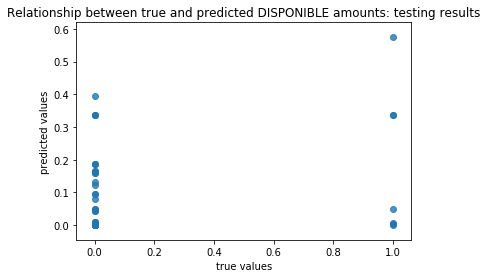

In [19]:
plot_y_yhat_scatter(y_test, trained_regressor.predict(X_test),train_test="testing")

## LINEAR REGRESSION

In [20]:
# Definir un linearregressor

lin_reg = LinearRegression()

# Entrenar el regresor con el dataset de train

lin_reg.fit(X_train, y_train)

# Predecir valores para las variables independientes de test

results = lin_reg.predict(X_test)

# Calcular la precisión
# Pista: explorar sklearn.metrics
print("Precisión global: " + str(metrics.r2_score(y_test, results)))
print("MSE: " + str(metrics.mean_squared_error(y_test, results)))

Precisión global: 0.04043044391541539
MSE: 0.015800242742012256


### CROSS-VALIDATION FOR 20 RANDOM PARTITIONS

In [0]:
# Scale values with standard deviation
X_train_scaled_list = []
X_test_scaled_list = []
y_train_list = []
y_test_list = []

# Loop for the 20 different partitions

for i in range(20):
    X_train, X_test, y_train, y_test = train_test_split( \
        X, y, test_size=0.3)
    
    # Standardization

    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Append each partition to lists
    
    X_train_scaled_list.append(X_train_scaled)
    X_test_scaled_list.append(X_test_scaled)
    y_train_list.append(y_train)
    y_test_list.append(y_test)

### Confusion matrix function

In [0]:
def conf_matrix(y_test, y_pred):
    
    """The conf_matrix function returns the final average confusion matrix for every partition. Each individual
    value of each confusion matrix is added up to the total confusion matrix, and in the end, each value of true
    positives, true negatives, false positives and false negatives are divided by the total number of partitions:
    in this case, 20.
    """
    total_conf = np.zeros((2,2))
    
    #Confusion matrix for breast:
    
    for i in range(len(y_pred)):
        confusion = confusion_matrix(y_test[i], y_pred[i])
        total_conf += confusion

    final_conf = total_conf / len(y_pred)
    TNB = final_conf[0][0]
    TPB = final_conf[1][1]
    FPB = final_conf[0][1]
    FNB = final_conf[1][0]

    PA = ((TPB + TNB) / (TNB + TPB + FPB + FNB))
    TPR = (TPB / (TPB + FNB))
    TNR = (TNB / (TNB + FPB))

    return final_conf, PA, TPR, TNR

## NAIVE BAYES

In [0]:
def NB_partitions(X_train_scaled, X_test_scaled, y_train, y_test):
    
    """NB_partitions fits the given partition scaled data sets to a Naive Bayes Classifier predictor. The predicted 
    classification output is stored in a variable, which is the input for the 
    """
    y_pred = []
    
    for i in range(len(X_test_scaled)):
        nb = GaussianNB()  #Gaussian object for Naive Bayes classifier
        nb.fit(X_train_scaled[i], y_train[i])
        y_pred_b = nb.predict(X_test_scaled[i])
        y_pred.append(y_pred_b)
    
    return conf_matrix(y_test, y_pred) #Calling the confusion matrix for Naive Bayes.

In [0]:
NB = NB_partitions(X_train_scaled_list, X_test_scaled_list, y_train_list, y_test_list) 

In [25]:
print(NB[0])
print('Prediction accuracy is: %f' % NB[1] )
print('True positive rate is: %f' % NB[2] )
print('True negative rate is: %f\n' % NB[3] )

[[597.65  21.3 ]
 [  6.45   1.6 ]]
Prediction accuracy is: 0.955742
True positive rate is: 0.198758
True negative rate is: 0.965587



### Linear Discriminant Analysis

In [0]:
def LDA_partitions(X_train_scaled, X_test_scaled, y_train, y_test):

    """This function fits the training and the test data sets to a Linear Discriminant Analysis object. The predicted
    output is given as an input to the confusion matrix above"""
    
    y_pred = []
    
    for i in range(len(X_test_scaled)):
        
        # Fit to LDA & training
        
        lda = LinearDiscriminantAnalysis() #Defines the fit to a LDA.
        lda.fit(X_train_scaled[i], y_train[i])
        y_pred_b = lda.predict(X_test_scaled[i])
        y_pred.append(y_pred_b)
    
    return conf_matrix(y_test, y_pred) #Calling the confusion matrix.

In [0]:
LDA = LDA_partitions(X_train_scaled_list, X_test_scaled_list, y_train_list, y_test_list) 

In [28]:
print(LDA[0])
print('Prediction accuracy is: %f' % LDA[1] )
print('True positive rate is: %f' % LDA[2] )
print('True negative rate is: %f\n' % LDA[3] )

[[6.1435e+02 4.6000e+00]
 [7.6500e+00 4.0000e-01]]
Prediction accuracy is: 0.980463
True positive rate is: 0.049689
True negative rate is: 0.992568



## Quadratic Discriminant Analysis

In [0]:
def hyperparameters_QDA(X_train_scaled, y_train):
    
    """Before running QDA, the optimal hyper-parameters are selected for each training set. Here, using the pipeline
    for a Quadratic Discriminant Analysis, a 10-fold cross validation is performed for each of the training sets, 
    in such a way that the best lambda value is stored in a list, returning, in turn, a list length of 20 parameters. 
    This final list is one input of the QDA partition analysis."""
    
    pipeline = Pipeline([ ('qda', QuadraticDiscriminantAnalysis()) ])
    lambda_tot = []

    #Choosing potential values for the regularization parameter.

    reg_param_values = np.linspace(0, 1, 10).tolist()
    param_grid = { 'qda__reg_param': reg_param_values }

    for i in range(20):

        # Evaluation of the performance of the values of the hyper-parameter.

        skfold = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=0)
        gridcv = GridSearchCV(pipeline, cv=skfold, n_jobs=1, param_grid=param_grid, \
            scoring=make_scorer(accuracy_score))
        gridcv.fit(X_train_scaled[i], y_train[i])

        # Obtaining mean (and stdev) for CV

        mean_accuracies = gridcv.cv_results_['mean_test_score']

        # Selection of the highest value of lambda
        param = reg_param_values[ np.argmax(mean_accuracies) ]
        
        lambda_tot.append(param)

    return lambda_tot  # Final list of hyper-parameters.

In [0]:
hyper_QDA = hyperparameters_QDA(X_train_scaled_list, y_train_list)

In [0]:
def QDA_partitions(X_train_scaled, X_test_scaled, y_train, y_test, lambda_tot):
    
    """ After the hyper-parameters selection, the QDA is actually performed, using as regularization parameter each of
    the lambda values from the function above. """

    y_pred = []
    
    for i in range(len(X_test_scaled)):
        qda = QuadraticDiscriminantAnalysis(reg_param = lambda_tot[i]) # QDA setting with lambda values
        qda.fit(X_train_scaled[i], y_train[i])
        y_pred_b = qda.predict(X_test_scaled[i])
        y_pred.append(y_pred_b)

    return conf_matrix(y_test, y_pred) # Calling to confusion matrix.

In [0]:
QDA = QDA_partitions(X_train_scaled_list, X_test_scaled_list, y_train_list, y_test_list, hyper_QDA)

In [33]:
print(QDA[0])
print('Prediction accuracy is: %f' % QDA[1] )
print('True positive rate is: %f' % QDA[2] )
print('True negative rate is: %f\n' % QDA[3] )

[[614.25   4.7 ]
 [  7.4    0.65]]
Prediction accuracy is: 0.980702
True positive rate is: 0.080745
True negative rate is: 0.992406



## Nearest Shrunken Centroids Classifier

In [0]:
def hyperparameters_NSCC(X_train_scaled, y_train):
    
    """Before running NSCC, the optimal hyper-parameters are selected for each training set. Here, using the pipeline
    for a Nearest Centroid Classifier, a 10-fold cross validation is performed for each of the training sets, 
    in such a way that the best lambda value is stored in a list, returning, in turn, a list length of 20 parameters. 
    This final list is one input of the Nearest Centroid partition analysis."""
    
    pipeline_nsc = Pipeline([ ('nsc', NearestCentroid()) ])
    lambda_tot = []
    
    #Choosing potential values for the regularization parameter.
    
    shrinkage_param_values = np.linspace(0, 8, 20).tolist()
    param_grid_nsc = {'nsc__shrink_threshold': shrinkage_param_values}

    for i in range(20):

        # Evaluation of the performance of the values of the hyper-parameter.

        skfold = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=0)
        gridcv_nsc = GridSearchCV(pipeline_nsc, cv=skfold, n_jobs=1, param_grid=param_grid_nsc, \
            scoring=make_scorer(accuracy_score))
        gridcv_nsc.fit(X_train_scaled[i], y_train[i])

        # Obtaining mean for CV
        
        mean_accuracies_nsc_bre = gridcv_nsc.cv_results_['mean_test_score']
        
        # Selection of the highest value of lambda
        
        lambda_b = shrinkage_param_values[ np.argmax(mean_accuracies_nsc_bre) ]
        lambda_tot.append(lambda_b)

    return lambda_tot #Final list of hyper-parameters.

In [0]:
hyper_NSCC = hyperparameters_NSCC(X_train_scaled_list, y_train_list)

In [0]:
def NSCC_partitions(X_train_scaled, X_test_scaled, y_train, y_test, lambda_tot):
   
    """ After the hyper-parameters selection, the QDA is actually performed, using as regularization parameter each of
   the lambda values from the function above. """
    y_pred = []
    
    for i in range(len(X_test_scaled)):
        nsc = NearestCentroid(shrink_threshold = lambda_tot[i])
        nsc.fit(X_train_scaled[i], y_train[i])
        y_pred_b = nsc.predict(X_test_scaled[i])
        y_pred.append(y_pred_b)

    return conf_matrix(y_test, y_pred) 

In [0]:
NSCC = NSCC_partitions(X_train_scaled_list, X_test_scaled_list, y_train_list, y_test_list, hyper_NSCC)

In [38]:
print(NSCC[0])
print('Prediction accuracy is: %f' % NSCC[1] )
print('True positive rate is: %f' % NSCC[2] )
print('True negative rate is: %f\n' % NSCC[3] )

[[618.95   0.  ]
 [  8.05   0.  ]]
Prediction accuracy is: 0.987161
True positive rate is: 0.000000
True negative rate is: 1.000000

